In [11]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

### Image Metadata Features
- Image create date and time
- Image dimensions
- Image compression format
- Device make and model
- Image resolution and aspect ratio
- Image artist
- Flash, aperture, focal length, and exposure
#### Raw Image and Channel Pixels

In [12]:
cat = io.imread('datasets/cat.png')
dog = io.imread('datasets/dog.png')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])
print(cat.shape, dog.shape)

(168, 300, 3) (168, 300, 3)


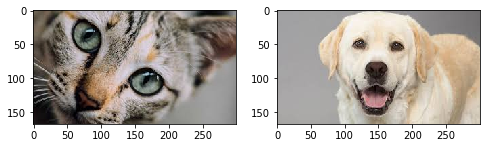

In [13]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(dog)

We can clearly see from result that we have two images of a cat and a dog having dimensions
168x300 pixels where each row and column denotes a specific pixel of the image. The third dimension
indicates these are color images having three color channels. Let’s now try to use numpy indexing to slice out
and extract the three color channels separately for the dog image.

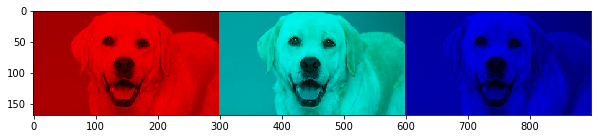

In [14]:
dog_r = dog.copy() # Red Channel
dog_r[:,:,1] = dog_r[:,:,2] = 0 # set G,B pixels = 0
dog_g = dog.copy() # Green Channel
dog_g[:,:,0] = dog_r[:,:,2] = 0 # set R,B pixels = 0
dog_b = dog.copy() # Blue Channel
dog_b[:,:,0] = dog_b[:,:,1] = 0 # set R,G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

In [15]:
dog_r[:,:,0]

Array([[160, 160, 160, ..., 113, 113, 112],
       [160, 160, 160, ..., 113, 113, 112],
       [160, 160, 160, ..., 113, 113, 112],
       ...,
       [165, 165, 165, ..., 212, 211, 210],
       [165, 165, 165, ..., 210, 210, 209],
       [164, 164, 164, ..., 209, 209, 209]], dtype=uint8)

#### Grayscale image pixel values
If you are dealing with color images, it might get difficult working with multiple channels and
three-dimensional arrays. Hence converting images to grayscale is a nice way of keeping the necessary pixel
intensity values but getting an easy to process two-dimensional image. Grayscale images usually capture the
luminance or intensity of each pixel such that each pixel value can be computed using the equation

$Y = 0.2125 \times R + 0.7154 \times G + 0.0721 \times B$

Where R, G & B are the pixel values of the three channels and Y captures the final pixel intensity
information and is usually ranges from 0(complete intensity absence - black) to 1(complete intensity
presence - white). The following snippet shows us how to convert RGB color images to grayscale and extract
the raw pixel values, which can be used as features.

In [16]:
from skimage.color import rgb2gray
cgs = rgb2gray(cat)
dgs = rgb2gray(dog)
print('Image shape:', cgs.shape, '\n')
# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')
# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (168, 300) 

2D image pixel map
[[0.42 0.41 0.41 ... 0.5  0.52 0.53]
 [0.41 0.41 0.4  ... 0.51 0.52 0.54]
 [0.4  0.4  0.4  ... 0.52 0.54 0.55]
 ...
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]] 

Flattened pixel map: [0.42 0.41 0.41 ... 0.51 0.51 0.51]


#### Binning image intensity distribution

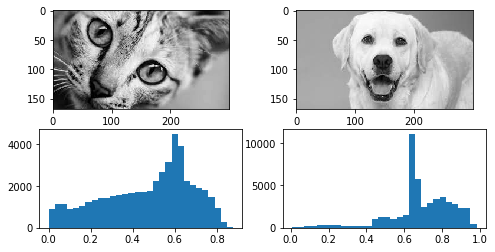

In [17]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)

### Image Aggregation Statistics
#### RGB ranges
We can compute RGB ranges for each image by basically subtracting the maximum from the minimum
value for pixel values in each channel. The following code helps us achieve this.

In [18]:
from scipy.stats import describe
cat_rgb = cat.reshape((168*300),3).T
dog_rgb = dog.reshape((168*300),3).T
cs = describe(cat_rgb,axis=1)
ds = describe(dog_rgb,axis=1)
cat_rgb_range = cs.minmax[1] - cs.minmax[0]
dog_rgb_range = ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([cat_rgb_range, dog_rgb_range], 
                            columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,Image,R_range,G_range,B_range
0,Cat,240,223,235
1,Dog,246,250,246


We can then use these range features as specific characteristic attributes of each image. Besides this, we
can also compute other metrics like mean, median, variance, skewness, and kurtosis for each image channel
as follows

In [19]:
cat_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cat_rgb, axis=1), 2)]).flatten()
dog_stats= np.array([np.round(ds.mean, 2),np.round(ds.variance, 2),
                        np.round(ds.kurtosis, 2),np.round(ds.skewness, 2),
                        np.round(np.median(dog_rgb, axis=1), 2)]).flatten()

stats_df = pd.DataFrame([cat_stats, dog_stats],
                        columns=['R_mean', 'G_mean', 'B_mean', 
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,Image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,Cat,127.48,118.80,111.94,3054.04,2863.78,3003.05,-0.63,-0.77,-0.94,-0.48,-0.50,-0.25,140.0,132.0,120.0
1,Dog,184.46,173.46,160.77,1887.71,1776.00,1574.73,1.30,2.24,2.32,-0.96,-1.12,-1.09,185.0,169.0,165.0


### Edge detection
One of the more interesting and sophisticated techniques involve detecting edges in an image. Edge
detection algorithms can be used to detect sharp intensity and brightness changes in an image and find
areas of interest. The canny edge detector algorithm developed by John Canny is one of the most widely
used edge detector algorithms today. This algorithm typically involves using a Gaussian distribution with
a specific standard deviation σ (sigma) to smoothen and denoise the image. Then we apply a Sobel filter
to extract image intensity gradients.

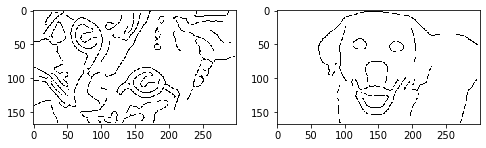

In [20]:
from skimage.feature import canny
cat_edges = canny(cgs, sigma=3)
dog_edges = canny(dgs, sigma=3)
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_edges, cmap='binary')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(dog_edges, cmap='binary')

### Object detection
Another interesting technique in the world of computer vision is object detection where features useful
in highlighting specific objects in the image are detected and extracted. The histogram of oriented
gradients, also known as `HOG`, is one of the techniques that’s extensively used in object detection.

The following code shows the HOG object detection technique on our sample images.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


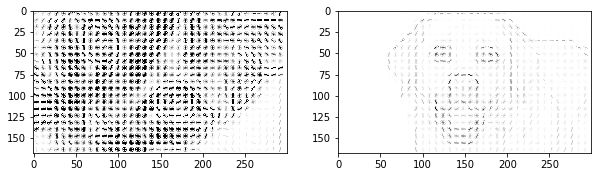

In [21]:
from skimage.feature import hog
from skimage import exposure
fd_cat, cat_hog = hog(cgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)
fd_dog, dog_hog = hog(dgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)

# rescaling intensity to get better plots
cat_hogs = exposure.rescale_intensity(cat_hog, in_range=(0, 0.04))
dog_hogs = exposure.rescale_intensity(dog_hog, in_range=(0, 0.04))
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_hogs, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_hog, cmap='binary')

In [22]:
print(fd_cat, fd_cat.shape)

[0.03784089 0.01940157 0.15044006 ... 0.         0.         0.        ] (47880,)


### Localized feature extraction

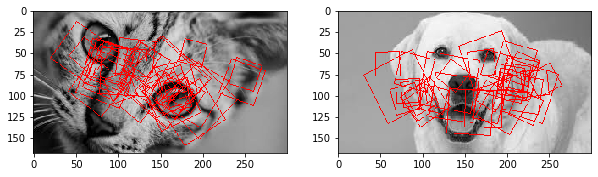

In [23]:
from mahotas.features import surf
import mahotas as mh
cat_mh = mh.colors.rgb2gray(cat)
dog_mh = mh.colors.rgb2gray(dog)
cat_surf = surf.surf(cat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)
dog_surf = surf.surf(dog_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=54)
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(cat_mh, cat_surf))
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(surf.show_surf(dog_mh, dog_surf))

In [24]:
cat_surf_fds = surf.dense(cat_mh, spacing=10)
dog_surf_fds = surf.dense(dog_mh, spacing=10)
cat_surf_fds.shape

(140, 64)

### Visual Bag of Words model
#### Engineering features from SURF feature descriptions with clustering
We will now use our 140x64 SURF feature descriptors for our two sample images and use K-means
clustering on them and compute VBOW vectors for each image by assigning each feature descriptor to one
of the bins. We will take k=20 in this case

In [25]:
from sklearn.cluster import KMeans
k = 20
km = KMeans(k,n_init=100, max_iter=100)
surf_fd_features = np.array([cat_surf_fds, dog_surf_fds])
km.fit(np.concatenate(surf_fd_features))

vbow_features = []
for feature_desc in surf_fd_features:
    labels = km.predict(feature_desc)
    vbow = np.bincount(labels, minlength=k)
    vbow_features.append(vbow)

vbow_df = pd.DataFrame(vbow_features)
pd.concat([df, vbow_df], axis=1)

,Image,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Cat,4,14,18,6,8,20,17,1,0,...,16,6,5,0,12,3,0,2,1,0
1,Dog,6,9,12,8,5,4,8,10,3,...,4,5,6,2,18,3,7,4,7,2


#### Trying out the VBOW pipeline on a new image

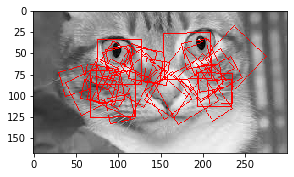

In [26]:
new_cat = io.imread('datasets/new_cat.png')
newcat_mh = mh.colors.rgb2gray(new_cat)
newcat_surf = surf.surf(newcat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(newcat_mh, newcat_surf))

Let’s now extract the dense SURF features and transform them into a VBOW vector using our previously
trained VBOW model. The following code helps us achieve this

In [27]:
new_surf_fds = surf.dense(newcat_mh, spacing=10)

labels = km.predict(new_surf_fds)
new_vbow = np.bincount(labels, minlength=k)
pd.DataFrame([new_vbow])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,22,8,9,14,1,20,8,1,3,12,9,8,0,17,2,0,2,4,0


Thus you can see the final VBOW feature vector for the new image based on SURF feature descriptors. This
is also an example of using an unsupervised Machine Learning model for feature engineering. You can now
compare the similarity of this new image with the other two sample images using some similarity metrics

In [28]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
eucdis = euclidean_distances(new_vbow.reshape(1,-1) , vbow_features)
cossim = cosine_similarity(new_vbow.reshape(1,-1) , vbow_features)

result_df = pd.DataFrame({'EuclideanDistance': eucdis[0],
              'CosineSimilarity': cossim[0]})
pd.concat([df, result_df], axis=1)

,Image,EuclideanDistance,CosineSimilarity
0,Cat,27.018512,0.805514
1,Dog,28.565714,0.760417


Based on the distance and similarity metrics, we can see that our new image (of a cat) is definitely closer
to the cat image than the dog image
### Automated Feature Engineering with Deep Learning

In [29]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as K

#### Build a basic 2-layer CNN
Let’s build a basic two-layer CNN now with a Max Pooling layer between them.

In [30]:
model = Sequential()
model.add(Conv2D(4, (4, 4), input_shape=(168, 300, 3), activation='relu', 
                 kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (4, 4), activation='relu', 
                kernel_initializer='glorot_uniform'))

#### Visualize the CNN architecture

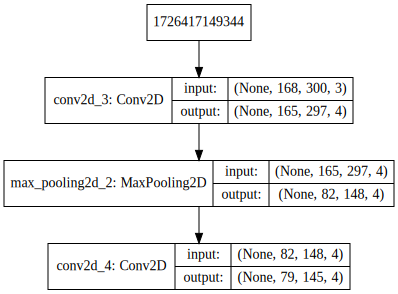

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

You can now understand from the depiction that we are using two two-dimensional
Convolutional layers containing four (4x4) filters. We also have a Max Pool layer between them of size (2x2)
for some downsampling. Let’s now build some functions to extract features from these intermediate network layers
#### Build functions to extract features from intermediate layers

In [32]:
first_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                              [model.layers[0].output])
second_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                               [model.layers[2].output])

Let’s now use these functions to extract the feature representations learned in the convolutional layers
and visualize these features to see what the network is trying to learn from the images
#### Extract and visualize image representation features

W0925 10:20:03.838741  5328 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



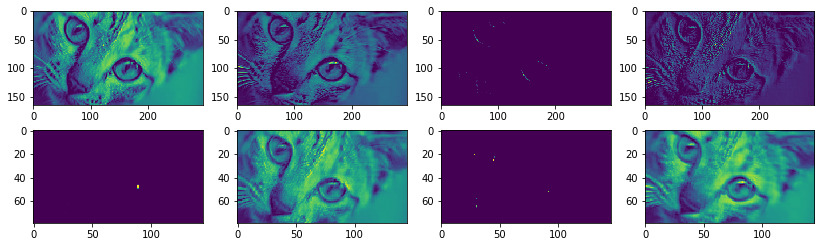

In [33]:
catr = cat.reshape(1, 168, 300,3)

# extract feaures 
first_conv_features = first_conv_layer([catr])[0][0]
second_conv_features = second_conv_layer([catr])[0][0]

# view feature representations
fig = plt.figure(figsize = (14,4))
ax1 = fig.add_subplot(2,4, 1)
ax1.imshow(first_conv_features[:,:,0])
ax2 = fig.add_subplot(2,4, 2)
ax2.imshow(first_conv_features[:,:,1])
ax3 = fig.add_subplot(2,4, 3)
ax3.imshow(first_conv_features[:,:,2])
ax4 = fig.add_subplot(2,4, 4)
ax4.imshow(first_conv_features[:,:,3])

ax5 = fig.add_subplot(2,4, 5)
ax5.imshow(second_conv_features[:,:,0])
ax6 = fig.add_subplot(2,4, 6)
ax6.imshow(second_conv_features[:,:,1])
ax7 = fig.add_subplot(2,4, 7)
ax7.imshow(second_conv_features[:,:,2])
ax8 = fig.add_subplot(2,4, 8)
ax8.imshow(second_conv_features[:,:,3])

In [34]:
sample_features = np.round(np.array(first_conv_features[:,:,1], dtype='float'), 2)
print(sample_features)
print(sample_features.shape)

[[19.35 18.85 18.15 ... 46.05 46.7  48.55]
 [17.4  17.2  17.09 ... 48.55 48.99 50.15]
 [17.5  16.81 16.52 ... 49.34 49.06 49.81]
 ...
 [ 8.13  7.71  7.31 ... 41.59 41.81 41.9 ]
 [ 8.49  7.74  7.43 ... 41.59 41.81 41.9 ]
 [ 8.28  8.13  7.21 ... 41.59 41.81 41.9 ]]
(165, 297)
